# **Bacteria Prediction**

## **Data Loading**

In [1]:
# Imports
import os
import numpy as np
import pandas as pd

In [2]:
# Print directory structure
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/tabular-playground-series-feb-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-feb-2022/train.csv
/kaggle/input/tabular-playground-series-feb-2022/test.csv


In [3]:
# Load training set
df = pd.read_csv("/kaggle/input/tabular-playground-series-feb-2022/train.csv")

## **Data Analysis**

In [4]:
df.shape

(200000, 288)

In [5]:
df.head()

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
0,0,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes
1,1,-9.536743e-07,-0.000010,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica
2,2,-9.536743e-07,-0.000002,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,...,0.000084,0.000048,0.000081,0.000106,0.000072,0.000010,0.000008,0.000019,1.046326e-06,Salmonella_enterica
3,3,4.632568e-08,-0.000006,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,...,0.000151,0.000100,0.000180,0.000202,0.000153,0.000021,0.000015,0.000046,-9.536743e-07,Salmonella_enterica
4,4,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Enterococcus_hirae


In [6]:
df.dtypes

row_id         int64
A0T0G0C10    float64
A0T0G1C9     float64
A0T0G2C8     float64
A0T0G3C7     float64
              ...   
A9T0G0C1     float64
A9T0G1C0     float64
A9T1G0C0     float64
A10T0G0C0    float64
target        object
Length: 288, dtype: object

In [7]:
# We drop the row_id column because we will not use it
df.drop(columns=["row_id"], inplace=True)
df.shape

(200000, 287)

In [8]:
# Check the presence of null values
df.isnull().values.any()

False

In [9]:
# Check that all the values in the dataframe are not equal to zero
df.all().all()

True

As we have seen, in the dataframe there aren't null or 0 values.

In [10]:
df.describe()

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
count,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,2.000000e+05,2.000000e+05
mean,6.421457e-07,-0.000003,-0.000014,-0.000010,0.000005,0.000025,0.000014,-0.000009,-0.000028,-0.000008,...,0.000135,0.000348,0.000253,0.000464,0.000581,0.000379,0.000062,8.982134e-05,1.170014e-04,2.215407e-07
std,8.654927e-05,0.000132,0.000287,0.000436,0.000683,0.000869,0.000775,0.000441,0.000107,0.000083,...,0.000711,0.001117,0.000914,0.001238,0.001528,0.001182,0.000466,5.475606e-04,6.788277e-04,2.050081e-05
min,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-9.536743e-06,-9.536743e-06,-9.536743e-07
25%,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-9.536743e-06,-9.536743e-06,-9.536743e-07
50%,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000237,-0.000199,-0.000114,-0.000043,-0.000010,...,0.000014,0.000064,0.000047,0.000124,0.000114,0.000043,-0.000010,4.632568e-07,4.632568e-07,-9.536743e-07
75%,-9.536743e-07,-0.000003,-0.000013,-0.000004,-0.000011,0.000003,-0.000030,0.000004,-0.000028,-0.000010,...,0.000111,0.000463,0.000297,0.000684,0.000774,0.000365,0.000030,6.046326e-05,6.946326e-05,-9.536743e-07
max,9.999046e-03,0.009990,0.009957,0.009886,0.019800,0.019760,0.019800,0.009886,0.009957,0.009990,...,0.019957,0.019914,0.019957,0.019914,0.019914,0.019957,0.009990,9.990463e-03,1.999046e-02,9.990463e-04


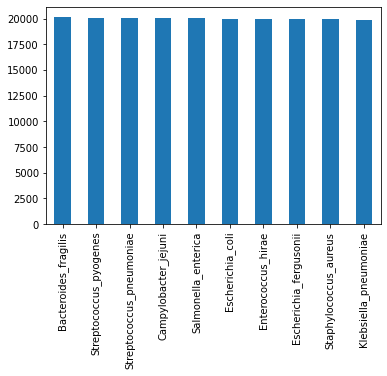

In [11]:
# Plot the distribution of values for the target column
df["target"].value_counts().plot(kind="bar");

As we can see, the different classes in the dataset are balanced.

## **Target Labels Encoding**

In [12]:
# Imports
from sklearn.preprocessing import LabelEncoder

In [13]:
# Label encoding of the target.
# We will map each of the 10 different target classess to an intger in the range 0-9
label_encoder = LabelEncoder()
df["target"] = label_encoder.fit(df["target"]).transform(df["target"])
df.head()

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
0,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,9
1,-9.536743e-07,-0.000010,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,6
2,-9.536743e-07,-0.000002,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,-0.000007,...,0.000084,0.000048,0.000081,0.000106,0.000072,0.000010,0.000008,0.000019,1.046326e-06,6
3,4.632568e-08,-0.000006,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,-0.000007,...,0.000151,0.000100,0.000180,0.000202,0.000153,0.000021,0.000015,0.000046,-9.536743e-07,6
4,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,2


## **Train-Test Split**

In [14]:
# Imports
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop(columns=["target"]), df["target"], test_size=0.33, stratify=df["target"], random_state=42)

In [16]:
print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (134000, 286)
Y_train shape: (134000,)
X_test shape: (66000, 286)
Y_test shape: (66000,)


## **Dimensionality Reduction** 

In [17]:
# Imports
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [18]:
# Standardize the features. This process is needed before doing the PCA.
st_scaler = StandardScaler()
st_scaler.fit(X_train)
X_train_st = st_scaler.transform(X_train)
X_train_st.shape

(134000, 286)

In [19]:
# Perform PCA
pca = PCA(n_components=50)
pca.fit(X_train_st)
X_train_pca = pca.transform(X_train_st)
X_train_pca.shape

(134000, 50)

## **ML Models Testing**

### **Decision Tree Classifier**

### **Deep Neural Network Model**

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(50,))
x = layers.Dense(50, activation="relu")(inputs)
x = layers.Dense(30, activation="relu")(x)
x = layers.Dense(20, activation="relu")(x)
outputs = layers.Dense(10, activation="softmax")(x)

dnn_model = keras.Model(inputs=inputs, outputs=outputs, name="dnn_model")
dnn_model.summary()

Model: "dnn_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
dense (Dense)                (None, 50)                2550      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
Total params: 4,910
Trainable params: 4,910
Non-trainable params: 0
_________________________________________________________________


2022-03-04 11:17:42.565695: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [21]:
dnn_model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [22]:
history = dnn_model.fit(X_train_pca, Y_train, batch_size=64, epochs=2, validation_split=0.2)

2022-03-04 11:17:42.968018: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/2
1675/1675 [==============================] - 7s 4ms/step - loss: 0.7808 - accuracy: 0.7305 - val_loss: 0.5040 - val_accuracy: 0.8202
Epoch 2/2
1675/1675 [==============================] - 5s 3ms/step - loss: 0.4390 - accuracy: 0.8442 - val_loss: 0.3972 - val_accuracy: 0.8584


## **Final Model Evaluation**

In [23]:
from sklearn.metrics import classification_report

In [24]:
final_model = dnn_model

In [25]:
# Preprocess the data

# Standardize
X_test_st = st_scaler.transform(X_test)
# PCA
X_test_pca = pca.transform(X_test_st)

In [26]:
Y_test_pred_p = final_model.predict(X_test_pca)
Y_test_pred = np.argmax(Y_test_pred_p, axis=1)

In [27]:
print(classification_report(Y_test, Y_test_pred, target_names=label_encoder.classes_))

                          precision    recall  f1-score   support

    Bacteroides_fragilis       0.90      0.91      0.91      6646
    Campylobacter_jejuni       0.91      0.95      0.93      6621
      Enterococcus_hirae       0.80      0.86      0.83      6583
        Escherichia_coli       0.78      0.77      0.77      6586
  Escherichia_fergusonii       0.80      0.81      0.81      6579
   Klebsiella_pneumoniae       0.93      0.94      0.94      6549
     Salmonella_enterica       0.85      0.82      0.84      6610
   Staphylococcus_aureus       0.89      0.91      0.90      6577
Streptococcus_pneumoniae       0.88      0.78      0.83      6624
  Streptococcus_pyogenes       0.82      0.79      0.81      6625

                accuracy                           0.86     66000
               macro avg       0.86      0.86      0.85     66000
            weighted avg       0.86      0.86      0.85     66000



## **Kaggle Submission Test**

In [28]:
# Load Kaggle's submission test set
df_subm = pd.read_csv("/kaggle/input/tabular-playground-series-feb-2022/test.csv")
df_subm.head()

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,...,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
0,200000,-9.536743e-07,-0.000002,-9.153442e-07,0.000024,0.000034,-0.000002,0.000021,0.000024,-0.000009,...,0.000039,0.000085,0.000055,0.000108,0.000090,0.000059,0.000010,0.000006,0.000027,4.632568e-08
1,200001,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,0.001800,-0.000240,0.001800,-0.000114,0.000957,...,-0.000043,0.000914,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07
2,200002,4.632568e-08,0.000003,8.465576e-08,-0.000014,0.000007,-0.000005,-0.000004,0.000003,0.000004,...,0.000041,0.000102,0.000084,0.000111,0.000117,0.000070,0.000020,0.000030,0.000021,4.632568e-08
3,200003,-9.536743e-07,-0.000008,8.084656e-06,0.000216,0.000420,0.000514,0.000452,0.000187,-0.000005,...,0.000069,0.000158,0.000098,0.000175,0.000217,0.000150,0.000018,0.000016,0.000051,-9.536743e-07
4,200004,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000043,-0.000086,-0.000043,-0.000086,0.000914,-0.000043,-0.000010,-0.000010,0.000990,-9.536743e-07


In [29]:
df_subm_results = pd.DataFrame(df_subm["row_id"])
df_subm_results.head()

,row_id
0,200000
1,200001
2,200002
3,200003
4,200004


In [30]:
X_subm = df_subm.drop(columns="row_id")

In [31]:
# Standardize test set
X_subm_st = st_scaler.transform(X_subm)
X_subm_st.shape

# PCA transform on test set
X_subm_pca = pca.transform(X_subm_st)
X_subm_pca.shape

(100000, 50)

In [32]:
Y_subm_predicted_p = final_model.predict(X_subm_pca)
Y_subm_predicted_p.shape

(100000, 10)

In [33]:
Y_subm_predicted = np.argmax(Y_subm_predicted_p, axis=1)
Y_subm_predicted_labeled = label_encoder.inverse_transform(Y_subm_predicted)
df_subm_results["target"] = Y_subm_predicted_labeled

In [34]:
df_subm_results.head()

,row_id,target
0,200000,Escherichia_fergusonii
1,200001,Salmonella_enterica
2,200002,Enterococcus_hirae
3,200003,Salmonella_enterica
4,200004,Staphylococcus_aureus


In [35]:
df_subm_results.to_csv("submission.csv", index=False)